In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

FILE_PATH = "C:\\Users\\chloe\\Downloads\\bank+marketing\\bank\\bank-full.csv"
df = pd.read_csv(FILE_PATH, sep=';')   # IMPORTANT: bank-full uses ';'

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [2]:
col_y = 'y'

## Select numeric columns only
col_numeric = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
sns.pairplot(
    df[col_numeric.tolist() + [col_y]],
    hue=col_y
)
plt.show()

KeyboardInterrupt: 

In [ ]:
# --- 1) Import libraries ------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 2) Load data -------------------------------------------------------------
FILE_PATH = "C:\\Users\\chloe\\Downloads\\bank+marketing\\bank\\bank-full.csv"  
df = pd.read_csv(FILE_PATH, sep=";")

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# --- 3) Quick checks ----------------------------------------------------------
df.shape
df.info()
df.isna().sum()
df['y'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


y
no     39922
yes     5289
Name: count, dtype: int64

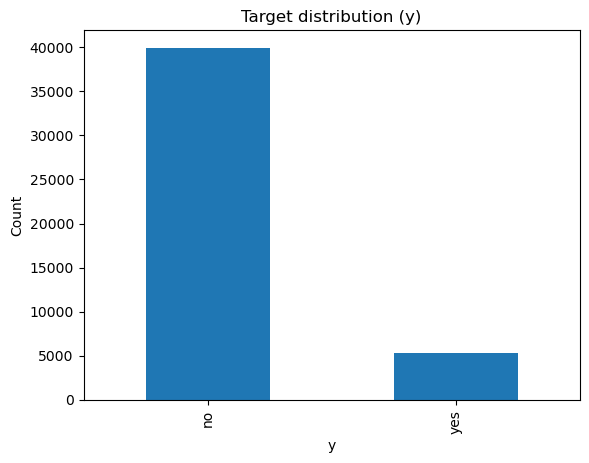

In [ ]:
# Optional: see target distribution (helps you justify baseline accuracy)
df['y'].value_counts().plot(kind='bar')
plt.title("Target distribution (y)")
plt.xlabel("y")
plt.ylabel("Count")
plt.show()


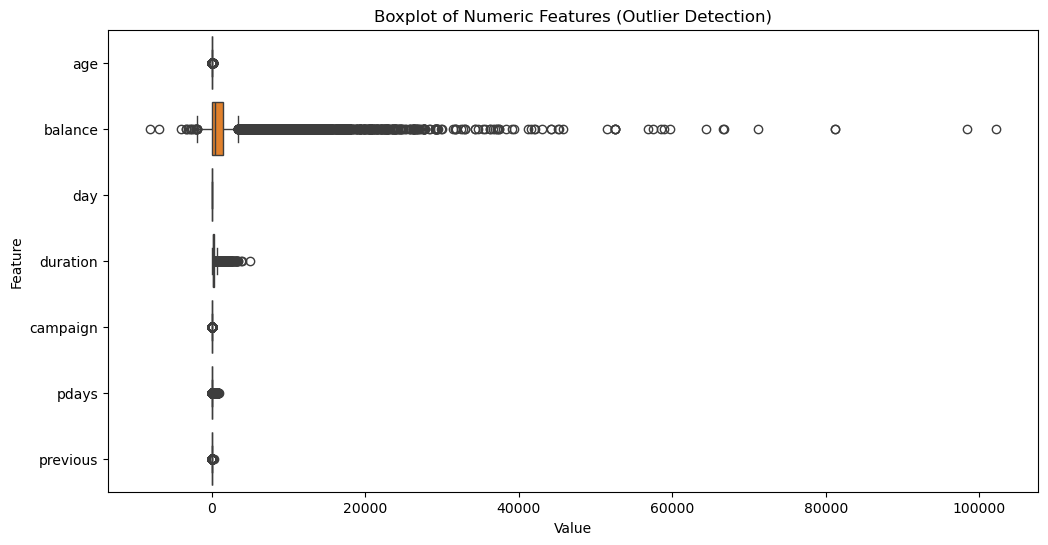

In [ ]:
# --- 3B) Outlier detection using boxplots ------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols], orient="h")
plt.title("Boxplot of Numeric Features (Outlier Detection)")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.show()


In [ ]:
# --- 4) Split into X (features) and y (target) --------------------------------
col_y = 'y'

y = df[col_y]                       # 'yes' / 'no'
X = df.drop([col_y], axis=1)

# One-Hot Encode categorical columns (same as your obesity example)
X = pd.get_dummies(X, drop_first=True)

X.head()


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
# --- 5) Train-test split ------------------------------------------------------
from sklearn.model_selection import train_test_split

test_size = 0.3
random_state = 2025

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state, stratify=y
)

X_train.shape, X_test.shape


((31647, 42), (13564, 42))

In [ ]:
# --- 6) Train Logistic Regression --------------------------------------------
from sklearn.linear_model import LogisticRegression

# Baseline Logistic Regression (simple, no tuning)
# max_iter increased so it has more chance to converge
logr = LogisticRegression(max_iter=500)

# Train model
logr.fit(X_train, y_train)

# Predict on test set
y_pred_logr = logr.predict(X_test)

# Display first few predictions
y_pred_logr[:10]




c:\Users\chloe\anaconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no'],
      dtype=object)

In [ ]:
# --- 7A) Evaluate using Accuracy ---------------------------------------------
from sklearn.metrics import accuracy_score

logr_acc = accuracy_score(y_test, y_pred_logr)
print("Logistic Regression Accuracy:", logr_acc)


Logistic Regression Accuracy: 0.8995871424358596


In [ ]:
# --- 7B) More detailed evaluation --------------------------------------------
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logr))


Confusion Matrix:
 [[11721   256]
 [ 1106   481]]

Classification Report:
               precision    recall  f1-score   support

          no       0.91      0.98      0.95     11977
         yes       0.65      0.30      0.41      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.64      0.68     13564
weighted avg       0.88      0.90      0.88     13564



In [ ]:
# --- 8) Save model + feature columns -----------------------------------------
import joblib

joblib.dump(logr, "bank_model_v1_logr.pkl")
joblib.dump(X.columns.tolist(), "bank_feature_cols.pkl")

print("Saved: bank_model_v1_logr.pkl")
print("Saved: bank_feature_cols.pkl")


Saved: bank_model_v1_logr.pkl
Saved: bank_feature_cols.pkl
